In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Exploratory Data Analysis(EDA)

<Axes: xlabel='Survived', ylabel='count'>

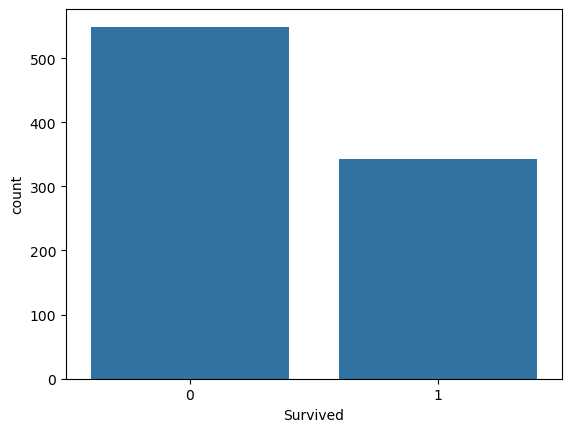

In [8]:
sns.countplot(x='Survived',data=df)

In [9]:
correlation=df.corr(numeric_only=True)

<Axes: >

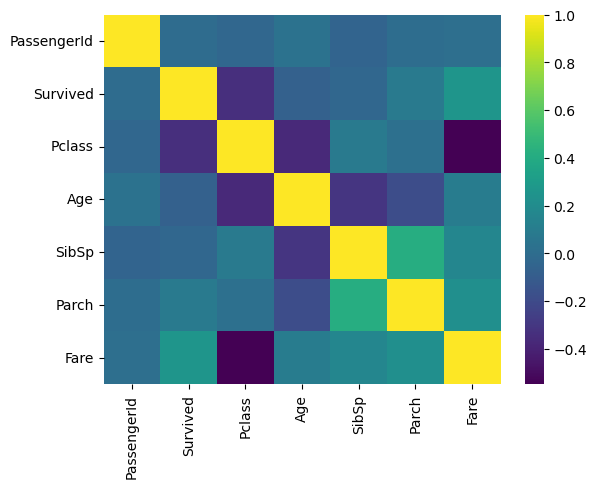

In [10]:
sns.heatmap(data=correlation,cmap='viridis')

In [11]:
df.corr(numeric_only=True)['Survived'].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64>

In [12]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

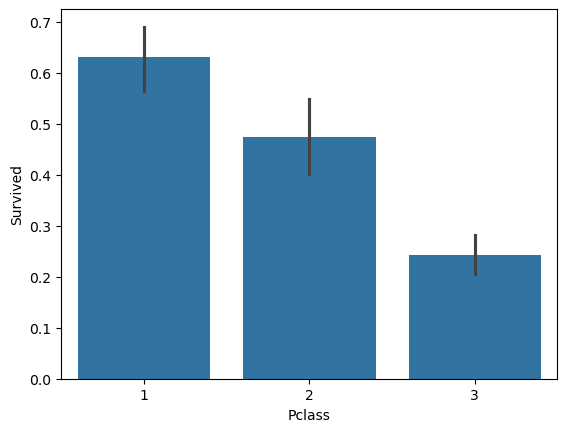

In [13]:
#Investigate PClass and whether they survived or not
sns.barplot(x='Pclass',y="Survived",data=df)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Survived'>

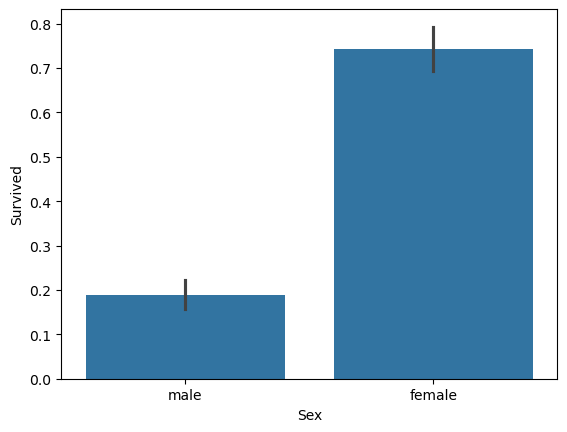

In [15]:
#Now see Sex and Survival
sns.barplot(x='Sex',y="Survived",data=df)

<Axes: xlabel='Survived', ylabel='Age'>

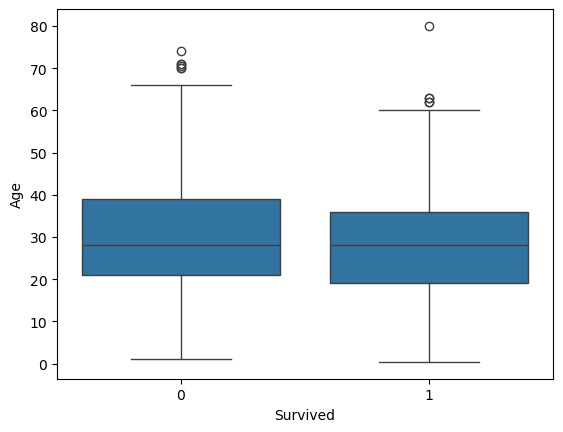

In [16]:
#Age and Survived
sns.boxplot(x='Survived', y='Age', data=df)


C:\Users\hp\AppData\Local\Temp\ipykernel_5104\2610173195.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()


<Axes: xlabel='AgeGroup', ylabel='Survived'>

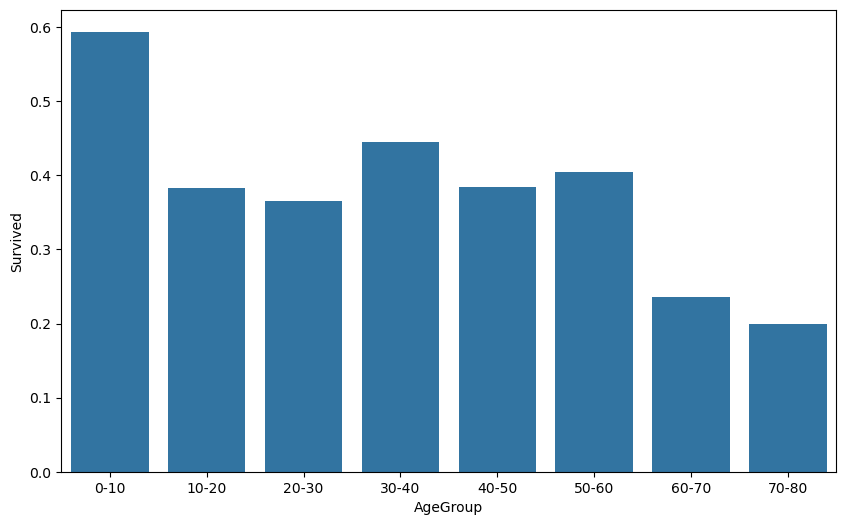

In [17]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Define the bins
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']  # Define the labels
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 2: Calculate the mean survival rate for each age bin
age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_group_survival)

In [18]:
(df.query('Age == 80'))
#Index 630

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,70-80


<Axes: xlabel='SibSp', ylabel='Survived'>

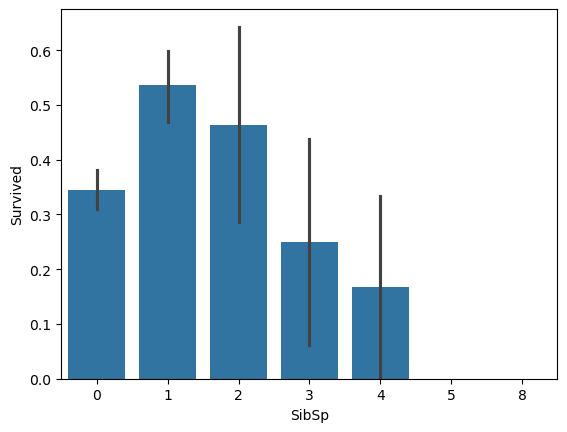

In [19]:
sns.barplot(x='SibSp',y='Survived',data=df)

In [20]:
#By using query they were all related so drop as not independent

indices_to_drop = df[(df['SibSp'] == 8) | (df['SibSp'] == 5)].index
df = df.drop(indices_to_drop)


df.query('SibSp==4')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,0-10
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,0-10
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,10-20
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,0-10
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0-10
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q,0-10
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,0-10
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,0-10
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,0-10
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,10-20


In [21]:
df['SibSp'] = np.where(df['SibSp'] >= 4, '4+', df['SibSp'].astype(str))

# Convert 'SibSp' to categorical type
df['SibSp'] = df['SibSp'].astype('category')

<Axes: xlabel='Parch', ylabel='Survived'>

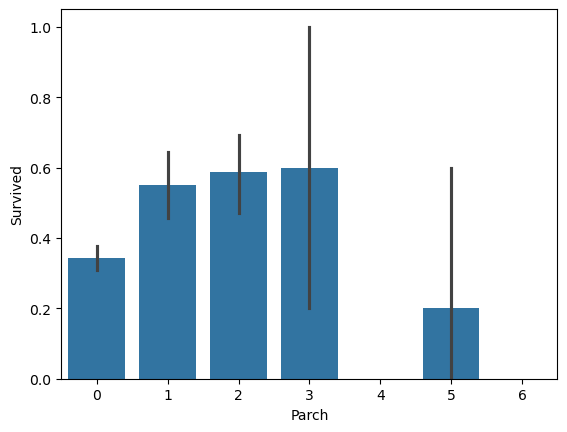

In [22]:
df['Parch'] = df['Parch'].astype('category')

sns.barplot(x='Parch',y='Survived',data=df)

In [23]:
df['Parch_group']=df['Parch'].apply(lambda x:x if x<4 else "3+")

In [24]:
test['SibSp'] = test['SibSp'].astype('category')
test['Parch'] = test['Parch'].astype('category')
test['Parch_group']=test['Parch'].apply(lambda x:x if x<4 else "3+")


In [25]:

#Ticket seem random and too many unique so we can drop this (it could be an indication of class but seems not)

df=df.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)



In [26]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Parch_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,20-30,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,30-40,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,20-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,30-40,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,30-40,0


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Parch_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Parch_group
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S,20-30,2
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C,30-40,0
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,B58 B60,C,40-50,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,B57 B59 B63 B66,C,10-20,2
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,C23 C25 C27,S,20-30,2
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,227.5250,NaN,C,40-50,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C,30-40,1
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,211.3375,B5,S,10-20,1
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C62 C64,C,10-20,0
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,227.5250,C45,C,30-40,0


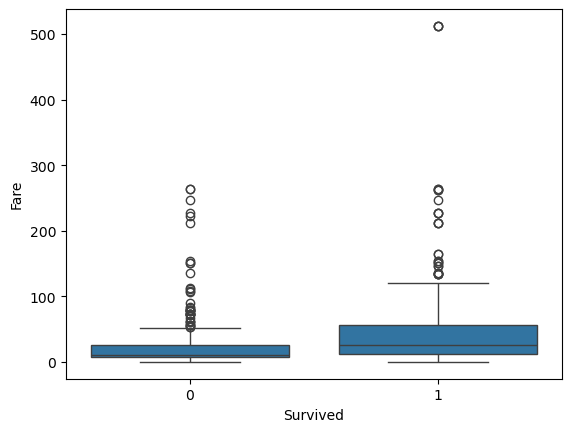

In [28]:
#Now look at the fare
sns.boxplot(x='Survived', y='Fare', data=df)
df.query('Survived == 1& Fare > 200')

In [29]:
df.corr(numeric_only=True)["Pclass"]

PassengerId   -0.034525
Survived      -0.332534
Pclass         1.000000
Age           -0.364143
Fare          -0.559861
Name: Pclass, dtype: float64

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example with categorical data 'Pclass' and continuous data 'Fare'
model = ols('Fare ~ C(Pclass)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df           F        PR(>F)
C(Pclass)  7.930809e+05    2.0  249.234139  2.059637e-86
Residual   1.393747e+06  876.0         NaN           NaN


In [31]:
from sklearn.cluster import KMeans
X=df['Fare'].values.reshape(-1,1)
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)

kmeans.cluster_centers_

array([[ 16.27355638],
       [ 90.02306053],
       [279.308545  ]])

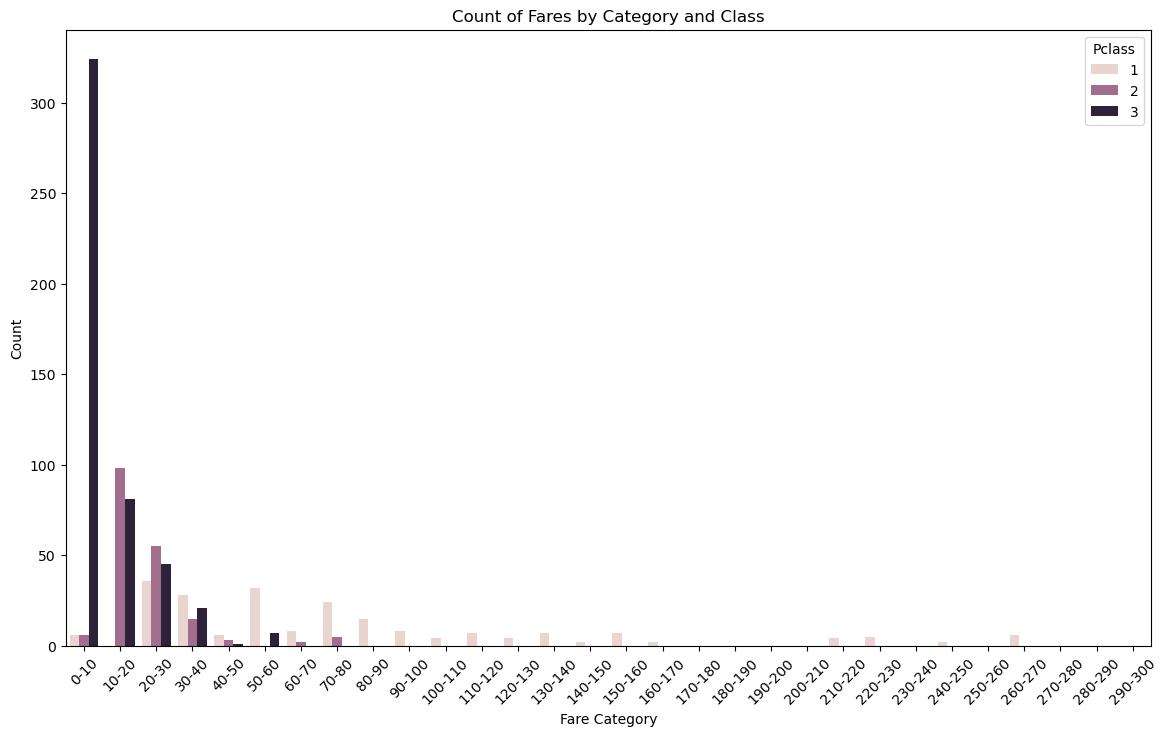

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins and labels
bins = [i for i in range(0, 310, 10)]  # Bins from 0 to 300 in increments of 10
labels = [f'{i}-{i+10}' for i in range(0, 300, 10)]   # Labels for each bin

# Create the FareCategory column
df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='FareCategory', hue='Pclass')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.title('Count of Fares by Category and Class')
plt.xticks(rotation=45)
plt.show()


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = pd.get_dummies(df[['Pclass', 'Fare']], drop_first=True)

# Add an intercept column for VIF calculation
X['intercept'] = 1

# Calculate VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

print(vif)

         VIF    Feature
0   1.456547     Pclass
1   1.456547       Fare
2  15.431790  intercept


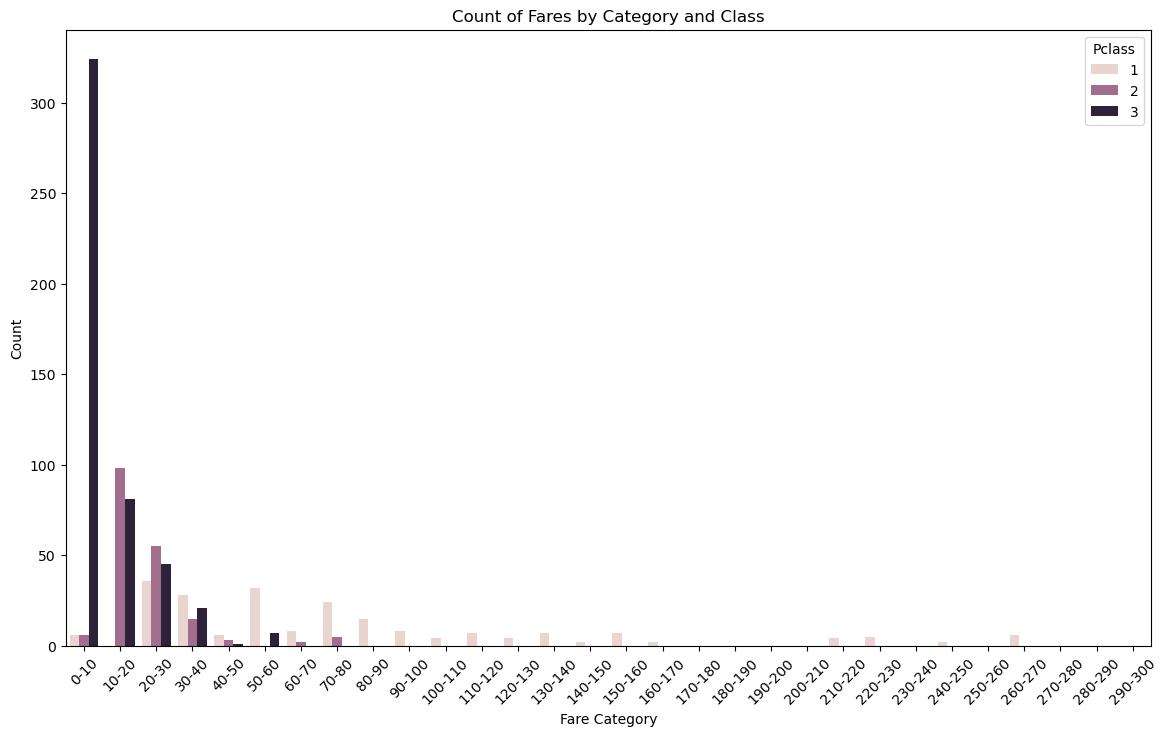

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins and labels
bins = [i for i in range(0, 310, 10)]  # Bins from 0 to 300 in increments of 10
labels = [f'{i}-{i+10}' for i in range(0, 300, 10)]   # Labels for each bin

# Create the FareCategory column
df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='FareCategory', hue='Pclass')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.title('Count of Fares by Category and Class')
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5104\332513250.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareCategory')['Survived'].mean().reset_index()


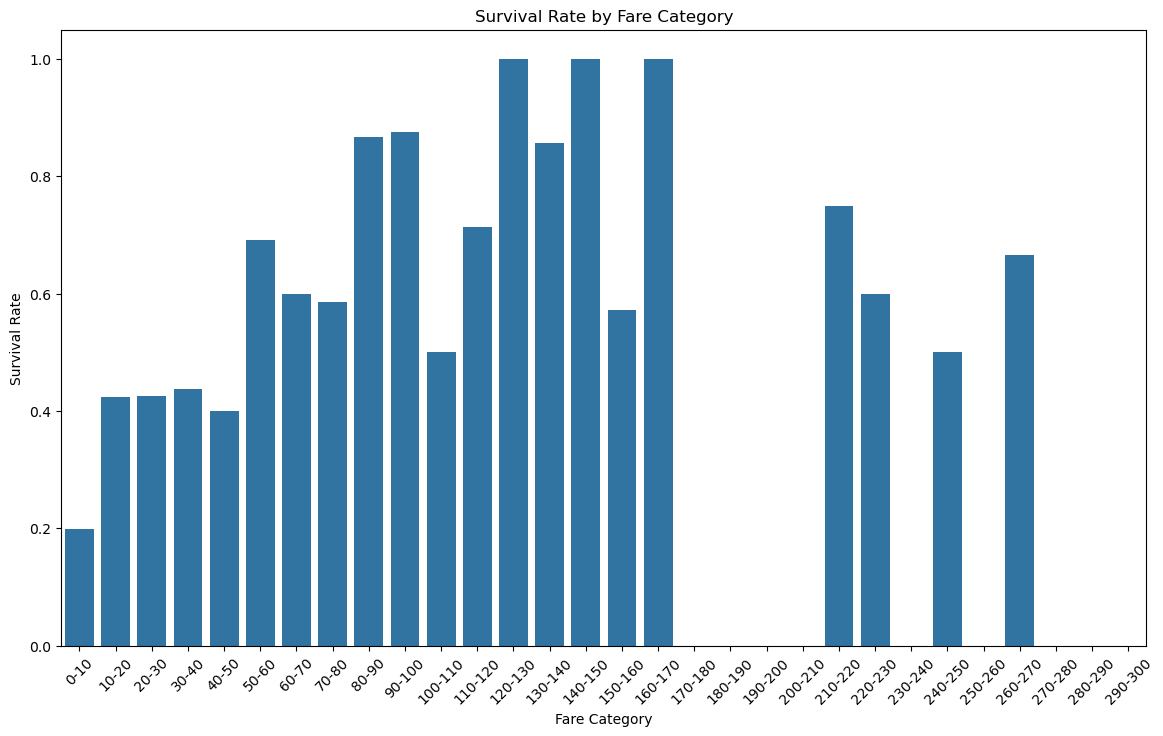

In [35]:
bins = [i for i in range(0, 310, 10)]  # Bins from 0 to 300 in increments of 10
labels = [f'{i}-{i+10}' for i in range(0, 300, 10)]   # Labels for each bin

# Create the FareCategory column
df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calculate survival rate for each fare category
fare_survival = df.groupby('FareCategory')['Survived'].mean().reset_index()

# Plot the survival rate by fare category
plt.figure(figsize=(14, 8))
sns.barplot(data=fare_survival, x='FareCategory', y='Survived')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Category')
plt.xticks(rotation=45)
plt.show()

In [36]:
df=df.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Parch_group,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,20-30,0,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,30-40,0,70-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,20-30,0,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,30-40,0,50-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,30-40,0,0-10


<Axes: xlabel='Embarked', ylabel='count'>

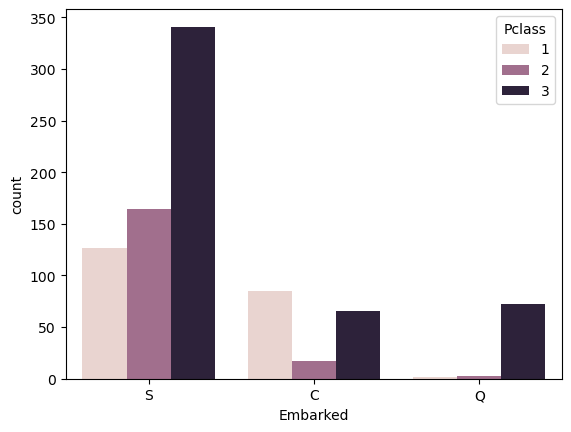

In [38]:
sns.countplot(data=df, x='Embarked', hue='Pclass')


In [39]:
##Fill it Age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Parch_group,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,20-30,0,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,30-40,0,70-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,20-30,0,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,30-40,0,50-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,30-40,0,0-10


In [40]:
#Filling out missing age values
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Define function to categorize into Child or Adult
def categorize_age(title):
    if title in ['Master']:
        return 'Child'
    elif title in ['Mr', 'Mrs', 'Miss', 'Ms']:
        return 'Adult'
    else:
        return 'Adult'

df['AgeGroup'] = df['Title'].apply(categorize_age)

# Group by Sex and Pclass and aggregate data
grouped = df.groupby(['Sex', 'Pclass', 'AgeGroup'])

agg_df = grouped.agg({
    'PassengerId': 'count',  
    'Survived': 'mean',      
    'Age': 'mean',           
    'Fare': 'mean'      
}).reset_index()

agg_df = agg_df.rename(columns={
    'PassengerId': 'Count',
    'Survived': 'SurvivalRate',
    'Age': 'AverageAge',
    'Fare': 'AverageFare'
})

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hp\AppData\Local\Temp\ipykernel_5104\1321995268.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [41]:
age_mapping = agg_df.set_index(['Sex', 'Pclass', 'AgeGroup'])['AverageAge'].to_dict()

def fill_age(row):
    if pd.isnull(row['Age']):
        return age_mapping[(row['Sex'], row['Pclass'], row['AgeGroup'])]
    else:
        return row['Age']

df['Age'] = df.apply(fill_age, axis=1)

#Filled age for missing age values

In [42]:
df['Age'].isnull().sum()

0

In [43]:
df = df.dropna(subset=['Embarked'])


In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Parch_group,FareCategory,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult,0,0-10,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,0,70-80,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult,0,0-10,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,0,50-60,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,0,0-10,Mr


In [45]:
df=df.drop(["PassengerId","Name","Parch","Title","FareCategory"],axis=1)

In [46]:
df=df.drop("AgeGroup",axis=1)

 # Training the model

Training data

Accuracy without tuning: 0.7841
Confusion Matrix (Default):
[[142  23]
 [ 34  65]]
Classification Report (Default):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       165
           1       0.74      0.66      0.70        99

    accuracy                           0.78       264
   macro avg       0.77      0.76      0.76       264
weighted avg       0.78      0.78      0.78       264



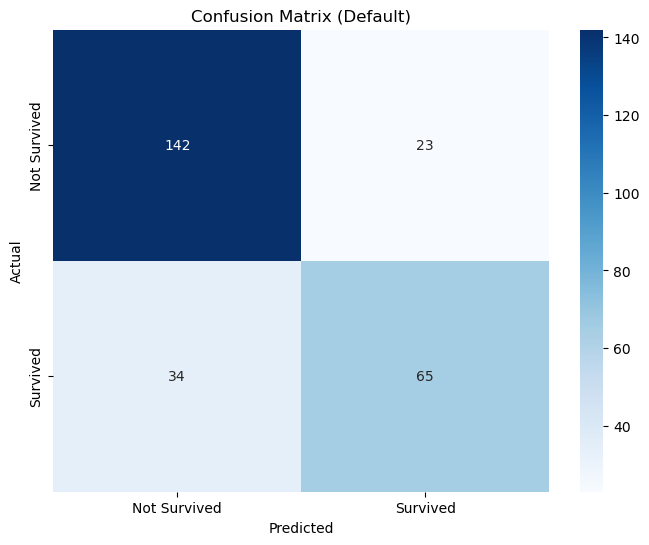

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df.drop("Survived",axis=1)
y = df["Survived"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_default = RandomForestClassifier(random_state=81)

rf_default.fit(X_train, y_train)

y_pred_default = rf_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
class_report_default = classification_report(y_test, y_pred_default)

# Print evaluation metrics
print(f'Accuracy without tuning: {accuracy_default:.4f}')
print('Confusion Matrix (Default):')
print(conf_matrix_default)
print('Classification Report (Default):')
print(class_report_default)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Default)')
plt.show()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8523
Confusion Matrix:
[[157  13]
 [ 26  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       170
           1       0.84      0.72      0.78        94

    accuracy                           0.85       264
   macro avg       0.85      0.82      0.83       264
weighted avg       0.85      0.85      0.85       264



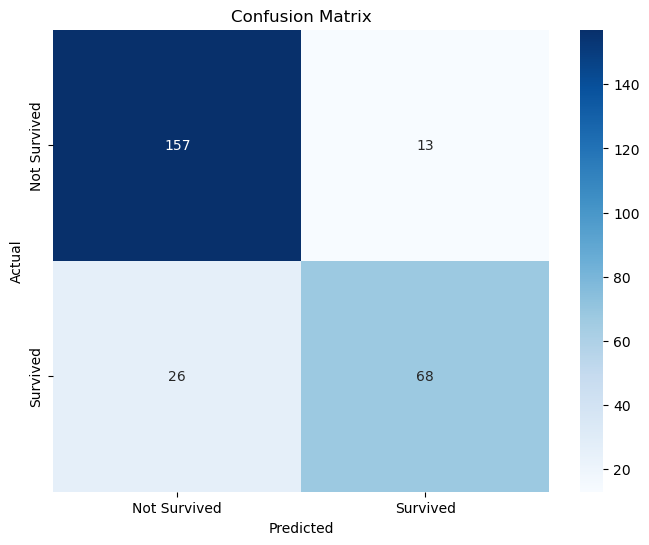

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("Survived",axis=1)
y = df["Survived"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=81)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, scoring='accuracy', verbose=2,cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy without tuning: 0.8409
Confusion Matrix (Default):
[[153  17]
 [ 25  69]]
Classification Report (Default):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       170
           1       0.80      0.73      0.77        94

    accuracy                           0.84       264
   macro avg       0.83      0.82      0.82       264
weighted avg       0.84      0.84      0.84       264



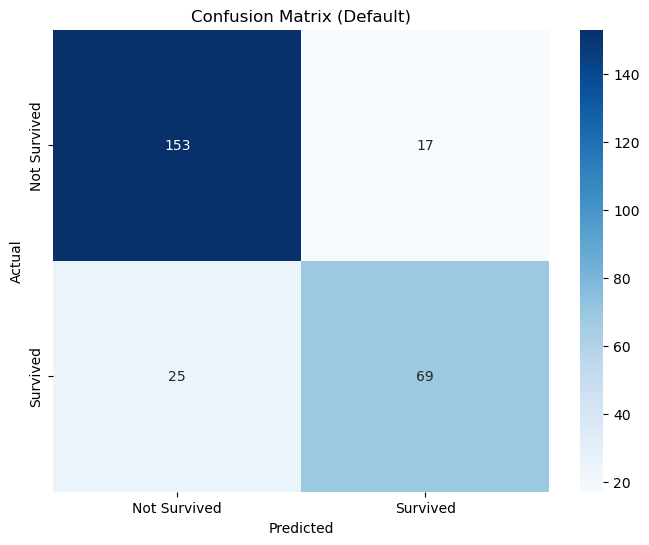

In [51]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_default = GradientBoostingClassifier(random_state=101)

gbm_default.fit(X_train, y_train)

y_pred_default = gbm_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
class_report_default = classification_report(y_test, y_pred_default)

print(f'Accuracy without tuning: {accuracy_default:.4f}')
print('Confusion Matrix (Default):')
print(conf_matrix_default)
print('Classification Report (Default):')
print(class_report_default)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Default)')
plt.show()


[I 2024-09-12 17:57:31,625] A new study created in memory with name: no-name-52817602-f075-4fed-8e70-e55f040785b6
[I 2024-09-12 17:57:32,121] Trial 5 finished with value: 0.8712121212121212 and parameters: {'n_estimators': 50, 'learning_rate': 0.1974363742540085, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 4, 'subsample': 0.9504630026390312}. Best is trial 5 with value: 0.8712121212121212.
[I 2024-09-12 17:57:32,251] Trial 1 finished with value: 0.8371212121212122 and parameters: {'n_estimators': 50, 'learning_rate': 0.1372521857824392, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 4, 'subsample': 0.9913601151600773}. Best is trial 5 with value: 0.8712121212121212.
[I 2024-09-12 17:57:32,532] Trial 2 finished with value: 0.821969696969697 and parameters: {'n_estimators': 50, 'learning_rate': 0.010346207021533915, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 2, 'subsample': 0.8680259074566323}. Best is trial 5 with value: 0.8712121212121212.


Best parameters: {'n_estimators': 50, 'learning_rate': 0.18772656076588298, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 3, 'subsample': 0.9150825341162185}
Accuracy with tuning: 0.8788
Confusion Matrix (Tuned):
[[159  11]
 [ 21  73]]
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       170
           1       0.87      0.78      0.82        94

    accuracy                           0.88       264
   macro avg       0.88      0.86      0.86       264
weighted avg       0.88      0.88      0.88       264



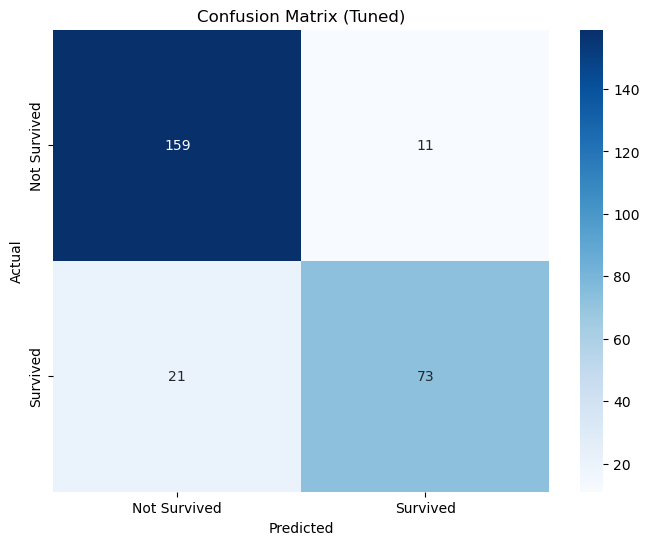

In [67]:
import optuna


categorical_features = ['col1', 'col2', 'col3']
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0)
    }
    
    
    gbm = GradientBoostingClassifier(random_state=101, **param)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200, n_jobs=-1)

# Get the best parameters
best_params = study.best_params
print(f'Best parameters: {best_params}')

# Train the final model using the best parameters
best_gbm = GradientBoostingClassifier(random_state=101, **best_params)
best_gbm.fit(X_train, y_train)
y_pred_tuned = best_gbm.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Print evaluation metrics
print(f'Accuracy with tuning: {accuracy_tuned:.4f}')
print('Confusion Matrix (Tuned):')
print(conf_matrix_tuned)
print('Classification Report (Tuned):')
print(class_report_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues'
            , xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned)')
plt.show()

[I 2024-09-12 17:26:21,749] A new study created in memory with name: no-name-234faaaf-f4c6-4a74-b028-f1bc9435eb24
[I 2024-09-12 17:26:21,969] Trial 1 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 50, 'learning_rate': 0.10111237252015745, 'max_depth': 6, 'min_child_weight': 9, 'subsample': 0.864037844728471, 'colsample_bytree': 0.8472060427431708, 'reg_alpha': 0.20620440699523168, 'reg_lambda': 0.34865983166159076}. Best is trial 1 with value: 0.8181818181818182.
[I 2024-09-12 17:26:22,009] Trial 3 finished with value: 0.821969696969697 and parameters: {'n_estimators': 50, 'learning_rate': 0.024078729095845325, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.9209030154856812, 'colsample_bytree': 0.8398399090772962, 'reg_alpha': 0.332021879604787, 'reg_lambda': 0.43393884709346753}. Best is trial 3 with value: 0.821969696969697.
[I 2024-09-12 17:26:22,019] Trial 0 finished with value: 0.821969696969697 and parameters: {'n_estimators': 100, 'learning_rate'

Best parameters: {'n_estimators': 250, 'learning_rate': 0.16563982806091054, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.9839175735471076, 'colsample_bytree': 0.9492983211683095, 'reg_alpha': 0.6517475119516385, 'reg_lambda': 0.5308568347681969}
Accuracy with tuning: 0.8636
Confusion Matrix (Tuned):
[[151  19]
 [ 17  77]]
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       170
           1       0.80      0.82      0.81        94

    accuracy                           0.86       264
   macro avg       0.85      0.85      0.85       264
weighted avg       0.86      0.86      0.86       264



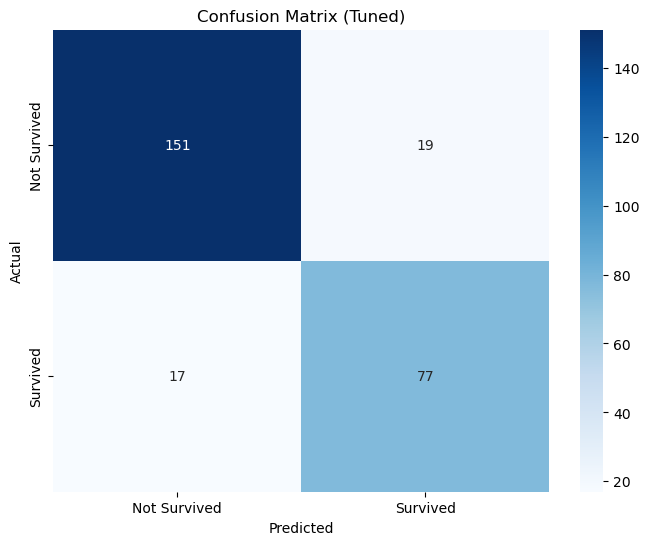

In [65]:
import xgboost as XGB
categorical_features = ['col1', 'col2', 'col3']

# Objective function to optimize hyperparameters
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),  # L2 regularization
        'objective': 'binary:logistic',  # Assuming binary classification
        'eval_metric': 'logloss'
    }
    
    gbm = xgb.XGBClassifier(random_state=101, use_label_encoder=False, **param)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200, n_jobs=-1)

# Get the best parameters
best_params = study.best_params
print(f'Best parameters: {best_params}')

# Train the final model using the best parameters
best_gbm = xgb.XGBClassifier(random_state=101, use_label_encoder=False, **best_params)
best_gbm.fit(X_train, y_train)
y_pred_tuned = best_gbm.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Print evaluation metrics
print(f'Accuracy with tuning: {accuracy_tuned:.4f}')
print('Confusion Matrix (Tuned):')
print(conf_matrix_tuned)
print('Classification Report (Tuned):')
print(class_report_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned)')
plt.show()

In [ ]:
X_train.head()

In [ ]:
test.head()

In [ ]:
PassengerId=test["PassengerId"]


In [ ]:
test.isnull().sum()


In [ ]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Define function to categorize into Child or Adult
def categorize_age(title):
    if title in ['Master']:
        return 'Child'
    elif title in ['Mr', 'Mrs', 'Miss', 'Ms']:
        return 'Adult'
    else:
        return 'Adult'

test['AgeGroup'] = test['Title'].apply(categorize_age)

# Group by Sex and Pclass and aggregate data
grouped = test.groupby(['Sex', 'Pclass', 'AgeGroup'])

agg_df = grouped.agg({
    'PassengerId': 'count',  
    'Age': 'mean',           
    'Fare': 'mean'      
}).reset_index()

agg_df = agg_df.rename(columns={
    'PassengerId': 'Count',
    'Age': 'AverageAge',
    'Fare': 'AverageFare'
})

age_mapping = agg_df.set_index(['Sex', 'Pclass', 'AgeGroup'])['AverageAge'].to_dict()

def fill_age(row):
    if pd.isnull(row['Age']):
        return age_mapping[(row['Sex'], row['Pclass'], row['AgeGroup'])]
    else:
        return row['Age']

test['Age'] = test.apply(fill_age, axis=1)

In [ ]:
test.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
missing_fare_df = test[test['Fare'].isnull()]

# Display the rows with missing 'Fare'
print(missing_fare_df)

In [ ]:
mean_fare_class3_male = df[(df['Pclass'] == 3) & (df['Sex'] == 'male')]['Fare'].mean()
print(f"Mean 'Fare' for passenger class 3 and male: {mean_fare_class3_male}")

test.loc[test['Fare'].isnull(), 'Fare'] = mean_fare_class3_male

missing_fare_df_after = test[test['Fare'].isnull()]
print(missing_fare_df_after)  

In [ ]:
test['SibSp'] = pd.to_numeric(test['SibSp'], errors='coerce')

test['SibSp'] = np.where(test['SibSp'] >= 4, '4+', test['SibSp'].astype(str))

# Convert 'SibSp' to a categorical type if needed
test['SibSp'] = test['SibSp'].astype('category')

# Verify the transformation
print(test['SibSp'].head())

In [ ]:
X=test[['Pclass','Sex','Age','SibSp','Fare','Embarked','Parch_group']]


In [ ]:
cat_X = pd.get_dummies(X, drop_first=True)
y_pred_tuned = best_gbm.predict(cat_X)



In [ ]:
test['PassengerId']

In [ ]:
result_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred_tuned
})

# Display the resulting DataFrame
print(result_df.head())




In [ ]:
result_df.to_csv('predictions.csv', index=False)


In [ ]:
y_pred = best_rf.predict(cat_X)


In [ ]:
result_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})

# Display the resulting DataFrame
print(result_df.head())




In [ ]:
result_df.to_csv('predictions.csv', index=False)
